# 🎧 Spotify Revenue Trend Analysis

This project analyzes quarterly revenue trends for Spotify using real financial data. The focus is on understanding how premium and ad-supported revenues contribute to overall company growth.

We'll use Python in Google Colab to:
- Clean the dataset
- Visualize revenue composition
- Highlight key financial insights
## 📦 Step 1: Import Libraries

We begin by importing the necessary libraries for data handling and visualization.

## 📂 Step 2: Load the Spotify CSV File

The dataset includes quarterly revenue figures for Spotify, covering total revenue, premium revenue, ad revenue, and cost-related metrics.

## 🧹 Step 3: Clean and Prepare the Data

We'll:
- Standardize column names
- Correct any typos
- Convert the date column to datetime format
- Drop missing values to ensure clean analysis

## 📊 Step 4: Pie Chart – Revenue Breakdown for Latest Quarter

This pie chart visualizes the percentage of revenue coming from Premium and Ad-supported users in the most recent quarter available in the dataset.

## 📊 Step 5: Stacked Bar Chart – Quarterly Revenue Composition

This chart shows how Spotify’s revenue is split between Premium and Ad Revenue over time. It helps identify trends, shifts in business model focus, and seasonality effects.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import pandas as pd

# Load the CSV file from local Google Colab environment
spotify_df = pd.read_csv('/content/Spotify_Quarterly_Normalized.csv')

# Preview the first few rows
spotify_df.head()
spotify_df.head()



,date,total_revenue,cost_of_revenue,gross_profit,premium_revenue,premium_cost_revenue,premium_gross_profit,ad_revenue,ad_cost_of_revenue,ad_gross_profit,maus,premium_maus,ad_maus,premium_arpu,sales_and_marketing_cost,research_and_development_cost,general_and_administrative_cost
0,2023-03-31,0.945230,0.944025,0.964080,0.997882,0.998404,0.996970,0.680000,0.743363,0.103448,1.000000,1.000000,1.000000,0.141844,0.690962,1.000000,0.759690
1,2022-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.672414,0.932292,0.968354,0.906383,0.304965,1.000000,0.943662,0.945736
2,2022-09-30,0.942580,0.950314,0.926724,0.965061,0.975259,0.946970,0.829333,0.858407,0.396552,0.846354,0.905063,0.812766,0.361702,0.938776,0.861972,0.914729
3,2022-06-30,0.866608,0.871069,0.860632,0.887242,0.892259,0.881818,0.762667,0.793510,0.344828,0.786458,0.860759,0.778723,0.297872,0.819242,0.721127,1.000000
4,2022-03-31,0.776943,0.764151,0.813218,0.821069,0.812450,0.843939,0.554667,0.587021,0.206897,0.757812,0.822785,0.723404,0.184397,0.542274,0.478873,0.689922


In [ ]:
# Standardize column names: lowercase, replace spaces and hyphens with underscores
spotify_df.columns = (
    spotify_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

# Correct the misspelled column name
spotify_df.rename(columns={
    "genreal_and_adminstraive_cost": "general_and_administrative_cost"
}, inplace=True)

# Convert the 'date' column to datetime format
spotify_df['date'] = pd.to_datetime(spotify_df['date'], dayfirst=True)

# Drop any rows with missing values to ensure clean visualizations
spotify_df.dropna(inplace=True)

# Confirm structure
spotify_df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             25 non-null     datetime64[ns]
 1   total_revenue                    25 non-null     float64       
 2   cost_of_revenue                  25 non-null     float64       
 3   gross_profit                     25 non-null     float64       
 4   premium_revenue                  25 non-null     float64       
 5   premium_cost_revenue             25 non-null     float64       
 6   premium_gross_profit             25 non-null     float64       
 7   ad_revenue                       25 non-null     float64       
 8   ad_cost_of_revenue               25 non-null     float64       
 9   ad_gross_profit                  25 non-null     float64       
 10  maus                             25 non-null     float64       


<ipython-input-13-a543e51a8e29>:16: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  spotify_df['date'] = pd.to_datetime(spotify_df['date'], dayfirst=True)


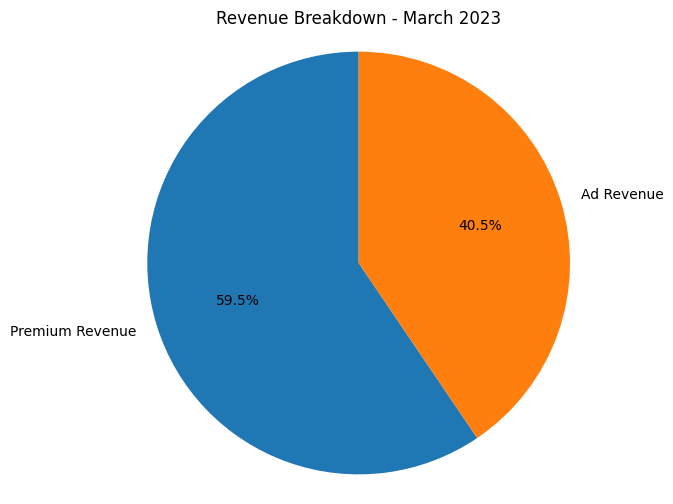

In [ ]:
import matplotlib.pyplot as plt

# Get the most recent quarter (latest date)
latest = spotify_df.sort_values(by='date', ascending=False).iloc[0]

# Prepare data for the pie chart
labels = ['Premium Revenue', 'Ad Revenue']
values = [latest['premium_revenue'], latest['ad_revenue']]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title(f"Revenue Breakdown - {latest['date'].strftime('%B %Y')}")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


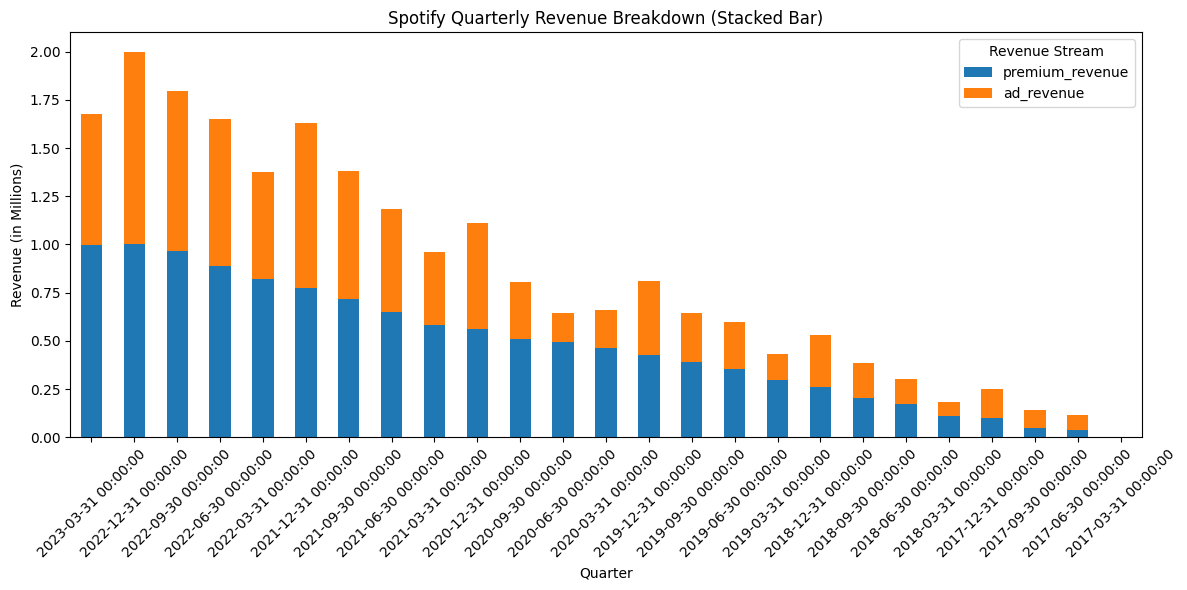

In [ ]:
# Set 'date' as index for proper ordering
spotify_df.set_index('date', inplace=True)

# Create a stacked bar chart for premium and ad revenue
spotify_df[['premium_revenue', 'ad_revenue']].plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6)
)

plt.title('Spotify Quarterly Revenue Breakdown (Stacked Bar)')
plt.xlabel('Quarter')
plt.ylabel('Revenue (in Millions)')
plt.xticks(rotation=45)
plt.legend(title='Revenue Stream')
plt.tight_layout()
plt.show()

